In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
import os
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
mouse_data_complete = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete.to_csv('mouse_data_complete.csv', encoding='utf-8')

# Display the data table for preview
mouse_data_complete

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
total_number_mice = mouse_data_complete['Mouse ID'].nunique()
total_number_mice

249

In [4]:
duplicated_mice_id = mouse_data_complete['Mouse ID'].duplicated()
duplicated_mice_id

0       False
1       False
2       False
3       False
4       False
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Name: Mouse ID, Length: 1893, dtype: bool

In [5]:
#  Get all the data for the duplicate mouse ID. 
mouse_data_complete['Duplicate_condition'] = mouse_data_complete['Mouse ID'].duplicated()
duplicate_mouse_data = mouse_data_complete.loc[mouse_data_complete['Duplicate_condition'] == True]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate_condition
137,g989,0,45.000000,0,Propriva,Female,21,26,True
250,a275,5,46.795257,0,Ceftamin,Female,20,28,True
251,w575,5,48.913860,1,Zoniferol,Female,16,28,True
252,x822,5,45.671104,1,Ceftamin,Male,3,29,True
253,l509,5,45.851193,0,Capomulin,Male,17,21,True
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,True
1889,u364,45,31.023923,3,Capomulin,Male,18,17,True
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,True
1891,x773,45,58.634971,4,Placebo,Female,21,30,True


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_data_complete.loc[mouse_data_complete['Duplicate_condition'] == False]
cleaned_mouse = cleaned_mouse_data.drop(['Duplicate_condition'], axis=1)
cleaned_mouse

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
total_number_mice_cleaned = cleaned_mouse_data['Mouse ID'].nunique()
total_number_mice_cleaned

249

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
mice_each_regime = mouse_data_complete.groupby(["Drug Regimen"])
mice_regime_summary = pd.DataFrame({"Mean": mice_each_regime["Tumour Volume (mm3)"].mean(),
                                    "Median": mice_each_regime["Tumour Volume (mm3)"].median(),
                                    "Variance": mice_each_regime["Tumour Volume (mm3)"].var(),
                                    "Standard Deviation": mice_each_regime["Tumour Volume (mm3)"].std(),
                                    "SEM": mice_each_regime["Tumour Volume (mm3)"].sem()})

mice_regime_summary
# Assemble the resulting series into a single summary dataframe.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
mice_each_regime[["Tumour Volume (mm3)"]].describe()


Tumour Volume (mm3)                                             \
                           count       mean       std        min        25%   
Drug Regimen                                                                  
Capomulin                  230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                   178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                  178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                   188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                   186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                    181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                   161.0  52.322552  6.507770  45.000000  47.081086   
Ramicane                   228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                   181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                  182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.854632  56.184664  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_each_regime.agg(
    {
        "Tumour Volume (mm3)": ["mean", "median", "var", "std", "sem"],
    }
)

Tumour Volume (mm3)                                          
                            mean     median        var       std       sem
Drug Regimen                                                              
Capomulin              40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin               52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol              52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril               55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol               54.331565  52.509285  66.173479  8.134708  0.596466
Placebo                54.033581  52.288934  61.168083  7.821003  0.581331
Propriva               52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane               40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn               54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol              53.236507  51.818479  48.533355  6.966589  0.516398

In [11]:
#Bar and Pie Charts
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
number_time_points = mice_each_regime['Tumour Volume (mm3)'].size()
number_time_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumour Volume (mm3), dtype: int64

In [12]:
values = mouse_data_complete['Drug Regimen'].unique()
values

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [13]:
x_axis = np.arange(len(values))
x_axis

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

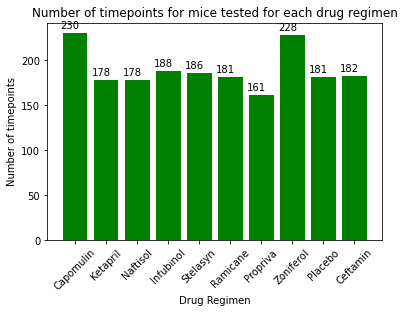

In [14]:
plt.bar(x_axis, number_time_points, color="g", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, values, rotation = 45)
plt.title("Number of timepoints for mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")
for x,y in enumerate(number_time_points):
    plt.text(x-0.15,y+5,'%s'%y,ha='center')
plt.show()

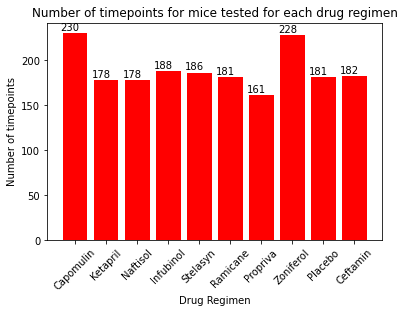

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(x_axis, number_time_points, color="r", align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, values, rotation = 45)
plt.title("Number of timepoints for mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of timepoints")
for x,y in enumerate(number_time_points):
    plt.text(x-0.15,y+3,'%s'%y,ha='center')
plt.show()

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
female_mice_data = cleaned_mouse_data.loc[cleaned_mouse_data['Sex'] == 'Female']
female_mice_data

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate_condition
0,b128,0,45.0,0,Capomulin,Female,9,22,False
2,g107,0,45.0,0,Ketapril,Female,2,29,False
3,a457,0,45.0,0,Ketapril,Female,11,30,False
10,z234,0,45.0,0,Naftisol,Female,19,27,False
12,y260,0,45.0,0,Ketapril,Female,7,25,False
...,...,...,...,...,...,...,...,...,...
238,i738,0,45.0,0,Capomulin,Female,23,20,False
241,g316,0,45.0,0,Capomulin,Female,22,22,False
245,t565,0,45.0,0,Capomulin,Female,20,17,False
246,i557,0,45.0,0,Capomulin,Female,1,24,False


In [17]:
male_mice_data = cleaned_mouse_data.loc[cleaned_mouse_data['Sex'] == 'Male']
male_mice_data

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate_condition
1,f932,0,45.0,0,Ketapril,Male,15,29,False
4,c819,0,45.0,0,Ketapril,Male,21,25,False
5,h246,0,45.0,0,Ketapril,Male,13,30,False
6,p189,0,45.0,0,Ketapril,Male,8,28,False
7,n923,0,45.0,0,Ketapril,Male,19,30,False
...,...,...,...,...,...,...,...,...,...
242,g288,0,45.0,0,Capomulin,Male,3,19,False
243,l897,0,45.0,0,Capomulin,Male,17,19,False
244,w150,0,45.0,0,Capomulin,Male,23,23,False
248,f966,0,45.0,0,Capomulin,Male,16,17,False


([<matplotlib.patches.Wedge at 0x19013765f08>,
 [Text(-0.7655308193487089, -0.9241009493704109, 'Male'),
  Text(0.7017365844029833, 0.8470925369228766, 'Female')],
 [Text(-0.44655964462008013, -0.5390588871327396, '50.2%'),
  Text(0.38276540967435446, 0.4620504746852053, '49.8%')])

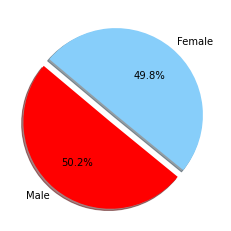

In [18]:
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [len(male_mice_data), len(female_mice_data)]

# The colours of each section of the pie chart
colours = ["red", "lightskyblue"]

# Tells matplotlib to separate the "Male" section
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)

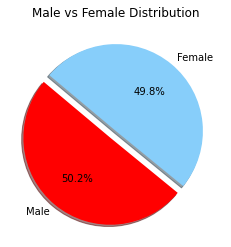

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [len(male_mice_data), len(female_mice_data)]

# The colours of each section of the pie chart
colours = ["red", "lightskyblue"]

# Tells matplotlib to separate the "Male" section
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male vs Female Distribution")
plt.show()

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_id_groupby = mouse_data_complete.groupby(['Mouse ID'])
max_time_point = pd.DataFrame({"Max values": mouse_id_groupby['Timepoint'].max()})
max_time_point

mouse_data_complete_2 = pd.merge(mouse_data_complete, max_time_point, how="left", on=["Mouse ID", "Mouse ID"])
mouse_data_complete_2.to_csv('mouse_data_complete_2.csv', encoding='utf-8')



In [22]:
greatest_time_point_df = mouse_data_complete_2.loc[mouse_data_complete_2['Timepoint'] == mouse_data_complete_2['Max values']]
greatest_time_point_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate_condition,Max values
1,f932,0,45.000000,0,Ketapril,Male,15,29,False,0
20,x336,0,45.000000,0,Naftisol,Female,4,29,False,0
53,h428,0,45.000000,0,Ketapril,Female,1,27,False,0
55,v199,0,45.000000,0,Naftisol,Female,17,29,False,0
109,o848,0,45.000000,0,Stelasyn,Female,14,27,False,0
...,...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,True,45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,True,45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,True,45
1891,x773,45,58.634971,4,Placebo,Female,21,30,True,45


In [23]:
greatest_time_point_df['Drug Regimen'].unique()

array(['Ketapril', 'Naftisol', 'Stelasyn', 'Zoniferol', 'Placebo',
       'Ceftamin', 'Propriva', 'Infubinol', 'Ramicane', 'Capomulin'],
      dtype=object)

In [24]:
#Calculating final tumour volume of each mouse across Capomulin, Ramicane, Infubinol, and Ceftamin
greatest_time_point_df_2 = greatest_time_point_df.loc[(greatest_time_point_df['Drug Regimen'] == 'Capomulin') | (greatest_time_point_df['Drug Regimen'] == 'Ramicane') | (greatest_time_point_df['Drug Regimen'] == 'Infubinol') | (greatest_time_point_df['Drug Regimen'] ==  'Ceftamin')]                                        
final_tumour_vol_4_regim =  greatest_time_point_df_2[['Mouse ID', 'Tumour Volume (mm3)', 'Drug Regimen']]  
final_tumour_vol_4_regim

,Mouse ID,Tumour Volume (mm3),Drug Regimen
182,u153,45.000000,Ceftamin
194,b447,45.000000,Ceftamin
217,x226,45.000000,Ceftamin
222,t573,45.000000,Ceftamin
420,c326,36.321346,Infubinol
...,...,...,...
1879,a644,32.978522,Ramicane
1885,i177,33.562402,Ramicane
1888,r944,41.581521,Capomulin
1889,u364,31.023923,Capomulin


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_selected = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments_selected

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [26]:
# Create empty list to fill with tumour vol data (for plotting)
tumour_vol = []


In [27]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
appended_data = []
for i in range(len(treatments_selected)):
    tumour_vol_perregimen = final_tumour_vol_4_regim.loc[final_tumour_vol_4_regim["Drug Regimen"] == treatments_selected[i]]
    quartiles = tumour_vol_perregimen.quantile([0.25,0.5,0.75])
    lowerq = np.quantile(tumour_vol_perregimen["Tumour Volume (mm3)"], 0.25)
    upperq = np.quantile(tumour_vol_perregimen["Tumour Volume (mm3)"], 0.75)
    iqr = upperq-lowerq
    lb = lowerq - (1.5*iqr)
    ub = upperq + (1.5*iqr)
    appended_data.append(tumour_vol_perregimen['Tumour Volume (mm3)'][(tumour_vol_perregimen['Tumour Volume (mm3)'] < lb) | (tumour_vol_perregimen['Tumour Volume (mm3)'] > ub)])
appended_data    
 
    

[Series([], Name: Tumour Volume (mm3), dtype: float64),
 Series([], Name: Tumour Volume (mm3), dtype: float64),
 420    36.321346
 Name: Tumour Volume (mm3), dtype: float64,
 Series([], Name: Tumour Volume (mm3), dtype: float64)]

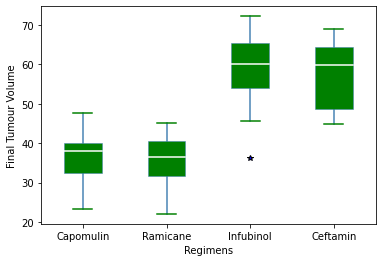

In [28]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
box_plot_data = []
for x in treatments_selected:
    box_plot_data.append((final_tumour_vol_4_regim.loc[final_tumour_vol_4_regim["Drug Regimen"] == x, ["Tumour Volume (mm3)"]]).squeeze())

label=treatments_selected
fig,ax1=plt.subplots()


#design
red_square = dict(markerfacecolor='b', marker='*')
ax1.boxplot(box_plot_data,labels=treatments_selected,flierprops=red_square,patch_artist=True,
            medianprops={'color':'white','linewidth':1.5},
            whiskerprops={'color':'steelblue','linewidth':1.5},
            boxprops={'facecolor':'green','edgecolor':'steelblue','linewidth':0.5},
            capprops={'color':'green','linewidth':1.5})
            
            

plt.xlabel('Regimens')
plt.ylabel('Final Tumour Volume')

plt.show()

In [44]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
data_Capomulin = mouse_data_complete.loc[(mouse_data_complete['Drug Regimen'] == 'Capomulin') & (mouse_data_complete['Mouse ID'] == 'b128')]
data_Capomulin

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Duplicate_condition
0,b128,0,45.000000,0,Capomulin,Female,9,22,False
472,b128,5,45.651331,0,Capomulin,Female,9,22,True
679,b128,10,43.270852,0,Capomulin,Female,9,22,True
719,b128,15,43.784893,0,Capomulin,Female,9,22,True
933,b128,20,42.731552,0,Capomulin,Female,9,22,True
1268,b128,25,43.262145,1,Capomulin,Female,9,22,True
1400,b128,30,40.605335,1,Capomulin,Female,9,22,True
1547,b128,35,37.967644,1,Capomulin,Female,9,22,True
1629,b128,40,38.379726,2,Capomulin,Female,9,22,True
1764,b128,45,38.982878,2,Capomulin,Female,9,22,True


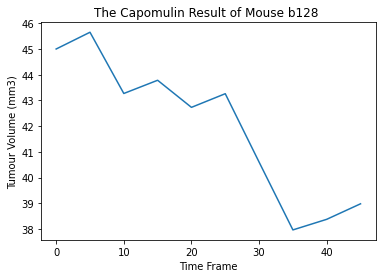

In [47]:

x = data_Capomulin["Timepoint"]
y = data_Capomulin["Tumour Volume (mm3)"]
plt.plot(x,y)
plt.title('The Capomulin Result of Mouse b128 ')
plt.xlabel('Time Frame')
plt.ylabel('Tumour Volume (mm3)')
plt.show()

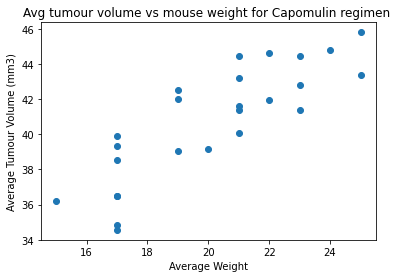

In [54]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
data_Capomulin_scatter = mouse_data_complete.loc[(mouse_data_complete['Drug Regimen'] == 'Capomulin')]
data_Capomulin_permouse = data_Capomulin_scatter.groupby(['Mouse ID']).mean()
x1 = data_Capomulin_permouse["Weight (g)"]
y1 = data_Capomulin_permouse["Tumour Volume (mm3)"]
plt.scatter(x1,y1)
plt.title('Avg tumour volume vs mouse weight for Capomulin regimen ')
plt.xlabel('Average Weight')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()

In [56]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
corr_coef = round(st.pearsonr(x1,y1)[0],3)
corr_coef

0.842

In [59]:
#linear regression model
lm_slope, lm_int, lm_r, lm_p, lm_std_err = stats.linregress(x1,y1)

In [60]:
lm_fit = lm_slope * x1 + lm_int

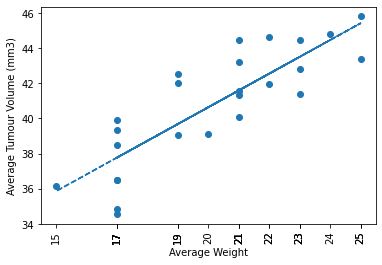

In [62]:
# Plot the linear model on top of scatter plot 
plt.scatter(x1,y1)
plt.plot(x1,lm_fit,"--")
plt.xticks(x1, rotation=90)
plt.xlabel('Average Weight')
plt.ylabel('Average Tumour Volume (mm3)')
plt.show()